# 学习一下opencv中的haarcascades的使用

这些是OpenCV中CascadeClassifier预训练的分类器模型，可以用于检测不同的目标。下面是每个模型的目标检测对象：

1. `haarcascade_eye.xml`：眼睛。

2. `haarcascade_eye_tree_eyeglasses.xml`：戴眼镜的眼睛。

3. `haarcascade_frontalcatface.xml`：正脸的猫脸。

4. `haarcascade_frontalcatface_extended.xml`：更加准确的正脸猫脸检测器。

5. `haarcascade_frontalface_alt.xml`：正脸的人脸。

6. `haarcascade_frontalface_alt2.xml`：更加准确的正脸人脸检测器。

7. `haarcascade_frontalface_alt_tree.xml`：基于CART算法的人脸检测器。

8. `haarcascade_frontalface_default.xml`：默认的人脸检测器。

9. `haarcascade_fullbody.xml`：全身。

10. `haarcascade_lefteye_2splits.xml`：左眼。

11. `haarcascade_licence_plate_rus_16stages.xml`：俄罗斯车牌号。

12. `haarcascade_lowerbody.xml`：下身。

13. `haarcascade_profileface.xml`：侧脸的人脸。

14. `haarcascade_righteye_2splits.xml`：右眼。

15. `haarcascade_russian_plate_number.xml`：俄罗斯车牌号。

16. `haarcascade_smile.xml`：微笑。

17. `haarcascade_upperbody.xml`：上身。

这些分类器模型可以在不同的场景中使用，但需要根据实际需求选择合适的模型。同时，也可以使用这些模型为基础进行训练，以适应更多的场景。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 打开cv2.data.haarcascades目录，查看其中的xml文件
os.listdir(cv2.data.haarcascades)

['haarcascade_eye.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_profileface.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_upperbody.xml',
 '__init__.py',
 '__pycache__']

## 图片

我们采用下面几张照片进行测试

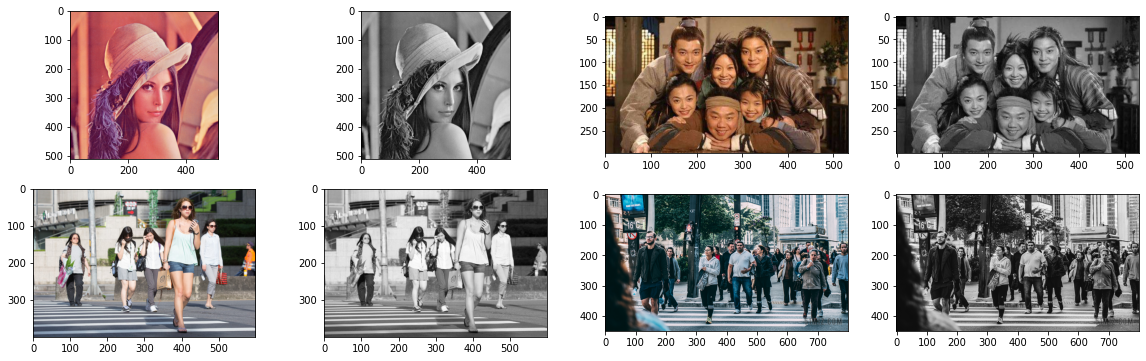

In [4]:
img_lena = cv2.imread('lena.png')
gray_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)

img_wulin = cv2.imread('wulin.jpeg')
gray_wulin = cv2.cvtColor(img_wulin, cv2.COLOR_BGR2GRAY)

img_pedestrian = cv2.imread('pedestrians.jpg')
gray_pedestrian = cv2.cvtColor(img_pedestrian, cv2.COLOR_BGR2GRAY)

img_pedestrian2 = cv2.imread('pedestrians2.jpeg')
gray_pedestrian2 = cv2.cvtColor(img_pedestrian2, cv2.COLOR_BGR2GRAY)

# 显示img_lena img_wulin
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(2, 4, 1)
ax1.imshow(img_lena[:,:,::-1])
ax2 = fig.add_subplot(2, 4, 2)
ax2.imshow(gray_lena, cmap='gray')
ax3 = fig.add_subplot(2, 4, 3)
ax3.imshow(img_wulin[:,:,::-1])
ax4 = fig.add_subplot(2, 4, 4)
ax4.imshow(gray_wulin, cmap='gray')
ax5 = fig.add_subplot(2, 4, 5)
ax5.imshow(img_pedestrian[:,:,::-1])
ax6 = fig.add_subplot(2, 4, 6)
ax6.imshow(gray_pedestrian, cmap='gray')
ax7 = fig.add_subplot(2, 4, 7)
ax7.imshow(img_pedestrian2[:,:,::-1])
ax8 = fig.add_subplot(2, 4, 8)
ax8.imshow(gray_pedestrian2, cmap='gray')
plt.show()

In [5]:
((img_lena.shape, gray_lena.shape, img_wulin.shape, gray_wulin.shape),
(img_pedestrian.shape, gray_pedestrian.shape, img_pedestrian2.shape, gray_pedestrian2.shape))

(((512, 512, 3), (512, 512), (300, 532, 3), (300, 532)),
 ((400, 600, 3), (400, 600), (450, 800, 3), (450, 800)))

## 简单识别

### 1. 人脸识别

先简单看一下人脸识别的例子

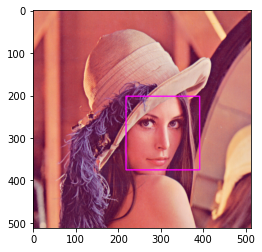

In [24]:
img_copy = img_lena.copy()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(
    gray_lena,  # 灰度图
    scaleFactor=1.1, # 每次搜索窗口的比例系数 
    minNeighbors=5 # 每个候选矩形框应该保留的邻居数
) # 返回的是一个anchor box的坐标
for (x,y,w,h) in faces:
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,255),2)
plt.figure(figsize=(4, 4))
plt.imshow(img_copy[:,:,::-1])

#### 识别多个人脸

`detectMultiScale()`函数是OpenCV中CascadeClassifier检测目标的函数，它的参数含义如下：

1. `gray_wulin`：需要检测目标的灰度图像，通常是输入图像的灰度版本。

2. `scaleFactor`：每次搜索窗口的比例系数，它表示在前一次搜索窗口的基础上，下一次搜索窗口的尺寸是上一次的多少倍。例如，如果`scaleFactor`为1.1，下一次搜索窗口的尺寸将是上一次尺寸的1.1倍。默认值为1.1。

3. `minNeighbors`：每个候选矩形框应该保留的邻居数。这个参数用于过滤掉一些误检的矩形框，如果一个矩形框周围的邻居矩形框的个数不足`minNeighbors`个，则该矩形框将被丢弃。默认值为3。

通过调整这两个参数，可以影响检测的准确性和速度。`scaleFactor`越小，检测速度越慢，但是检测精度越高；`minNeighbors`越大，误检率越低，但是漏检率可能会增加，所以需要根据实际需求进行调整。

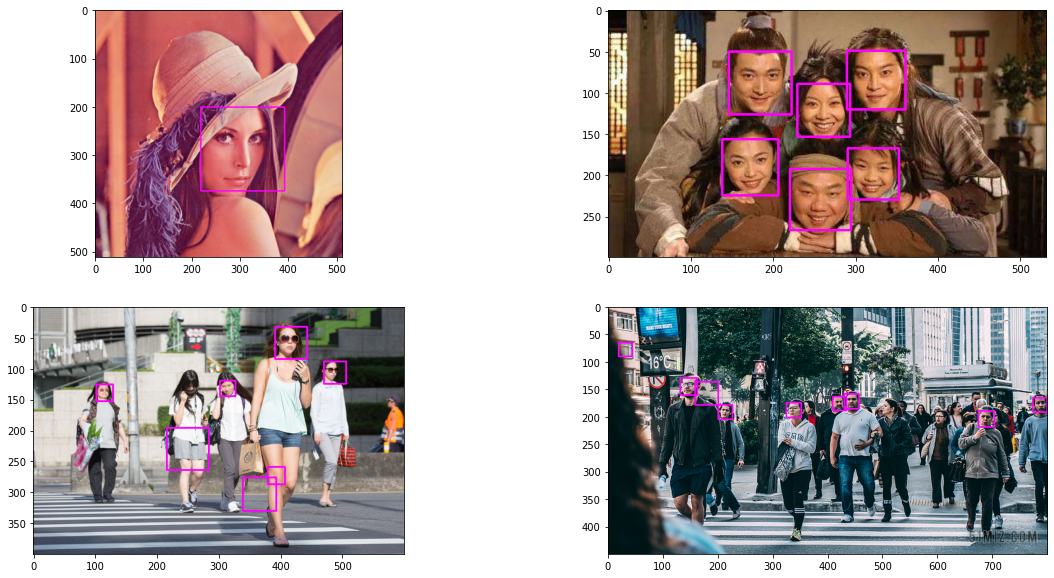

In [58]:
img_list = [img_lena, img_wulin, img_pedestrian, img_pedestrian2]
gray_list = [gray_lena, gray_wulin, gray_pedestrian, gray_pedestrian2]
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
img_with_anchor_box = []
for i in range(4):
    img_copy = img_list[i].copy()
    faces = face_cascade.detectMultiScale(
        gray_list[i],  # 灰度图
        scaleFactor=1.1, # 每次搜索窗口的比例系数 
        minNeighbors=2 # 每个候选矩形框应该保留的邻居数
    ) # 返回的是一个anchor box的坐标
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,255),2)
    img_with_anchor_box.append(img_copy)
fig = plt.figure(figsize=(20, 10))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(img_with_anchor_box[i][:,:,::-1])
plt.show()

## 其它的识别

In [24]:
xml_list = os.listdir(cv2.data.haarcascades)
xml_list = [i for i in xml_list if i.endswith('.xml')]

### 选定不同的分类器和照片

Text(0.5, 1.0, 'haarcascade_fullbody')

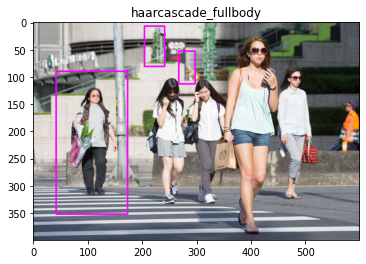

In [107]:
img_index = 2
xml_index = 8
img_copy = img_list[img_index].copy()
gray_copy = gray_list[img_index].copy()
object_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + xml_list[xml_index])
objects = object_cascade.detectMultiScale(
    gray_copy,  # 灰度图
    scaleFactor=1.05, # 每次搜索窗口的比例系数 
    minNeighbors=1 # 每个候选矩形框应该保留的邻居数
) # 返回的是一个anchor box的坐标
for (x,y,w,h) in objects:
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,255),2)
# plt.figure(figsize=(4, 4))
plt.imshow(img_copy[:,:,::-1])
plt.title(xml_list[xml_index].split('.')[0])

### 查看不同的图片的识别效果

haarcascade_fullbody


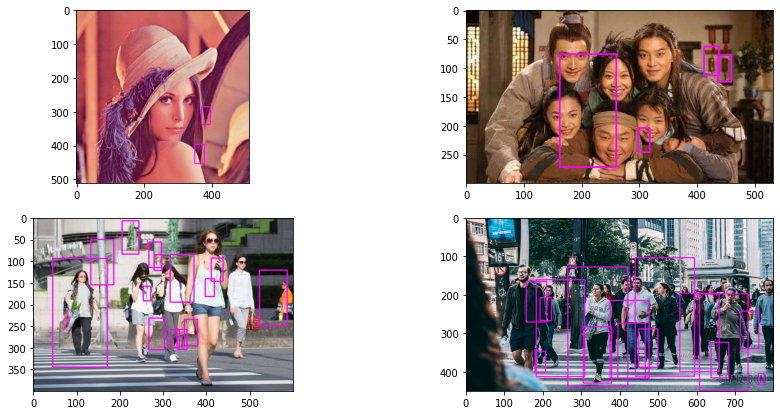

In [111]:
xml_index = 8
print(xml_list[xml_index].split('.')[0])
object_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + xml_list[xml_index])
img_with_anchor_box = []
for i in range(4):
    img_copy = img_list[i].copy()
    objects = object_cascade.detectMultiScale(
        gray_list[i],  # 灰度图
        scaleFactor=1.01, # 每次搜索窗口的比例系数 
        minNeighbors=1 # 每个候选矩形框应该保留的邻居数
    ) # 返回的是一个anchor box的坐标
    for (x,y,w,h) in objects:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,255),2)
    img_with_anchor_box.append(img_copy)
fig = plt.figure(figsize=(15, 7))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(img_with_anchor_box[i][:,:,::-1])
plt.show()

### 查看不同的分类器的识别效果

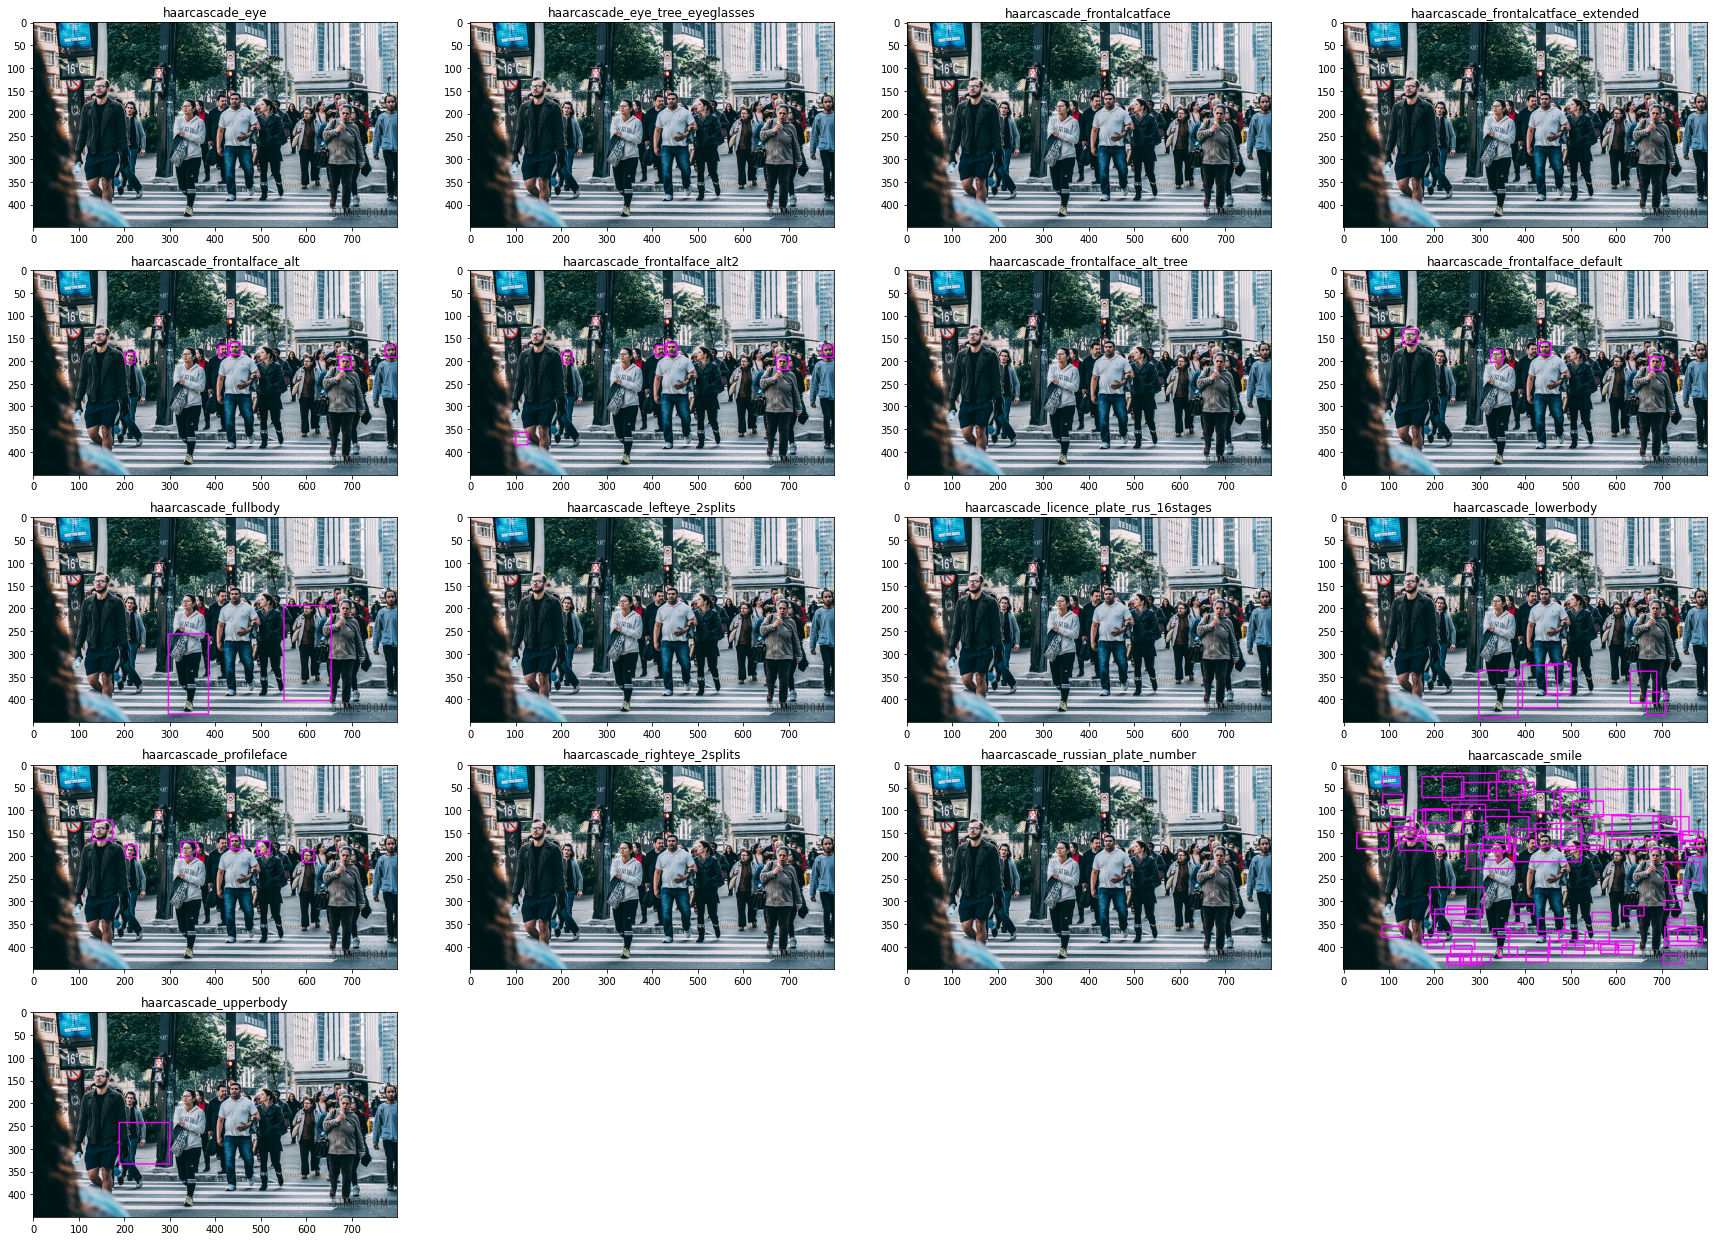

In [106]:
img_index = 3
img_copy_list = []
for xml_index in range(len(xml_list)):
    img_copy = img_list[img_index].copy()
    gray_copy = gray_list[img_index].copy()
    object_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + xml_list[xml_index])
    objects = object_cascade.detectMultiScale(
        gray_copy,  # 灰度图
        scaleFactor=1.1, # 每次搜索窗口的比例系数 
        minNeighbors=4 # 每个候选矩形框应该保留的邻居数
    ) # 返回的是一个anchor box的坐标
    for (x,y,w,h) in objects:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,255),2)
    img_copy_list.append(img_copy)
fig = plt.figure(figsize=(30, 22))
for i in range(len(xml_list)):
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(img_copy_list[i][:,:,::-1])
    ax.title.set_text(xml_list[i].split('.')[0])
plt.show()